
1.	Initial data inspection and data cleaning:

a.	Examine the data initially to identify duplicates, missing values, irrelevant entries, or outliers. Check for any instances of erroneous entries and rectify them as needed


In [116]:
#importing Libreries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

In [117]:
df= pd.read_csv("rolling_stones_spotify.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [118]:
memory_before = df.memory_usage(deep=True)
print(memory_before)
print(f"Total Memory: {memory_before.sum() / 1024**2:.2f} MB")
df=df.astype({col:'category' for col in df.select_dtypes(include=["object"]).columns})
df=df.astype({col:'int16' for col in df.select_dtypes(include=["int64"]).columns})
df=df.astype({col:'float32' for col in df.select_dtypes(include=["float64"]).columns})
memory_after = df.memory_usage(deep=True)
print(memory_after)
print(f"Total Memory before: {memory_before.sum() / 1024**2:.2f} MB")
print(f"Total Memory after: {memory_after.sum() / 1024**2:.2f} MB")

Index                  132
Unnamed: 0           12880
name                125464
album               120990
release_date         94990
track_number         12880
id                  114310
uri                 136850
acousticness         12880
danceability         12880
energy               12880
instrumentalness     12880
liveness             12880
loudness             12880
speechiness          12880
tempo                12880
valence              12880
popularity           12880
duration_ms          12880
dtype: int64
Total Memory: 0.72 MB
Index                  132
Unnamed: 0            3220
name                114487
album                10603
release_date          7077
track_number          3220
id                  183618
uri                 206158
acousticness          6440
danceability          6440
energy                6440
instrumentalness      6440
liveness              6440
loudness              6440
speechiness           6440
tempo                 6440
valence             

In [119]:
#removing duplicates
df.drop_duplicates(inplace=True)


In [120]:
# Identifying Outliers
# Using IQR method to identify outliers
numerical_columns= df.select_dtypes(include=['int16', 'float32']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1   
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)
outlier_percentage = outliers.mean() * 100
print(f"Percentage of outliers: {outlier_percentage:.2f}%")





Percentage of outliers: 30.43%


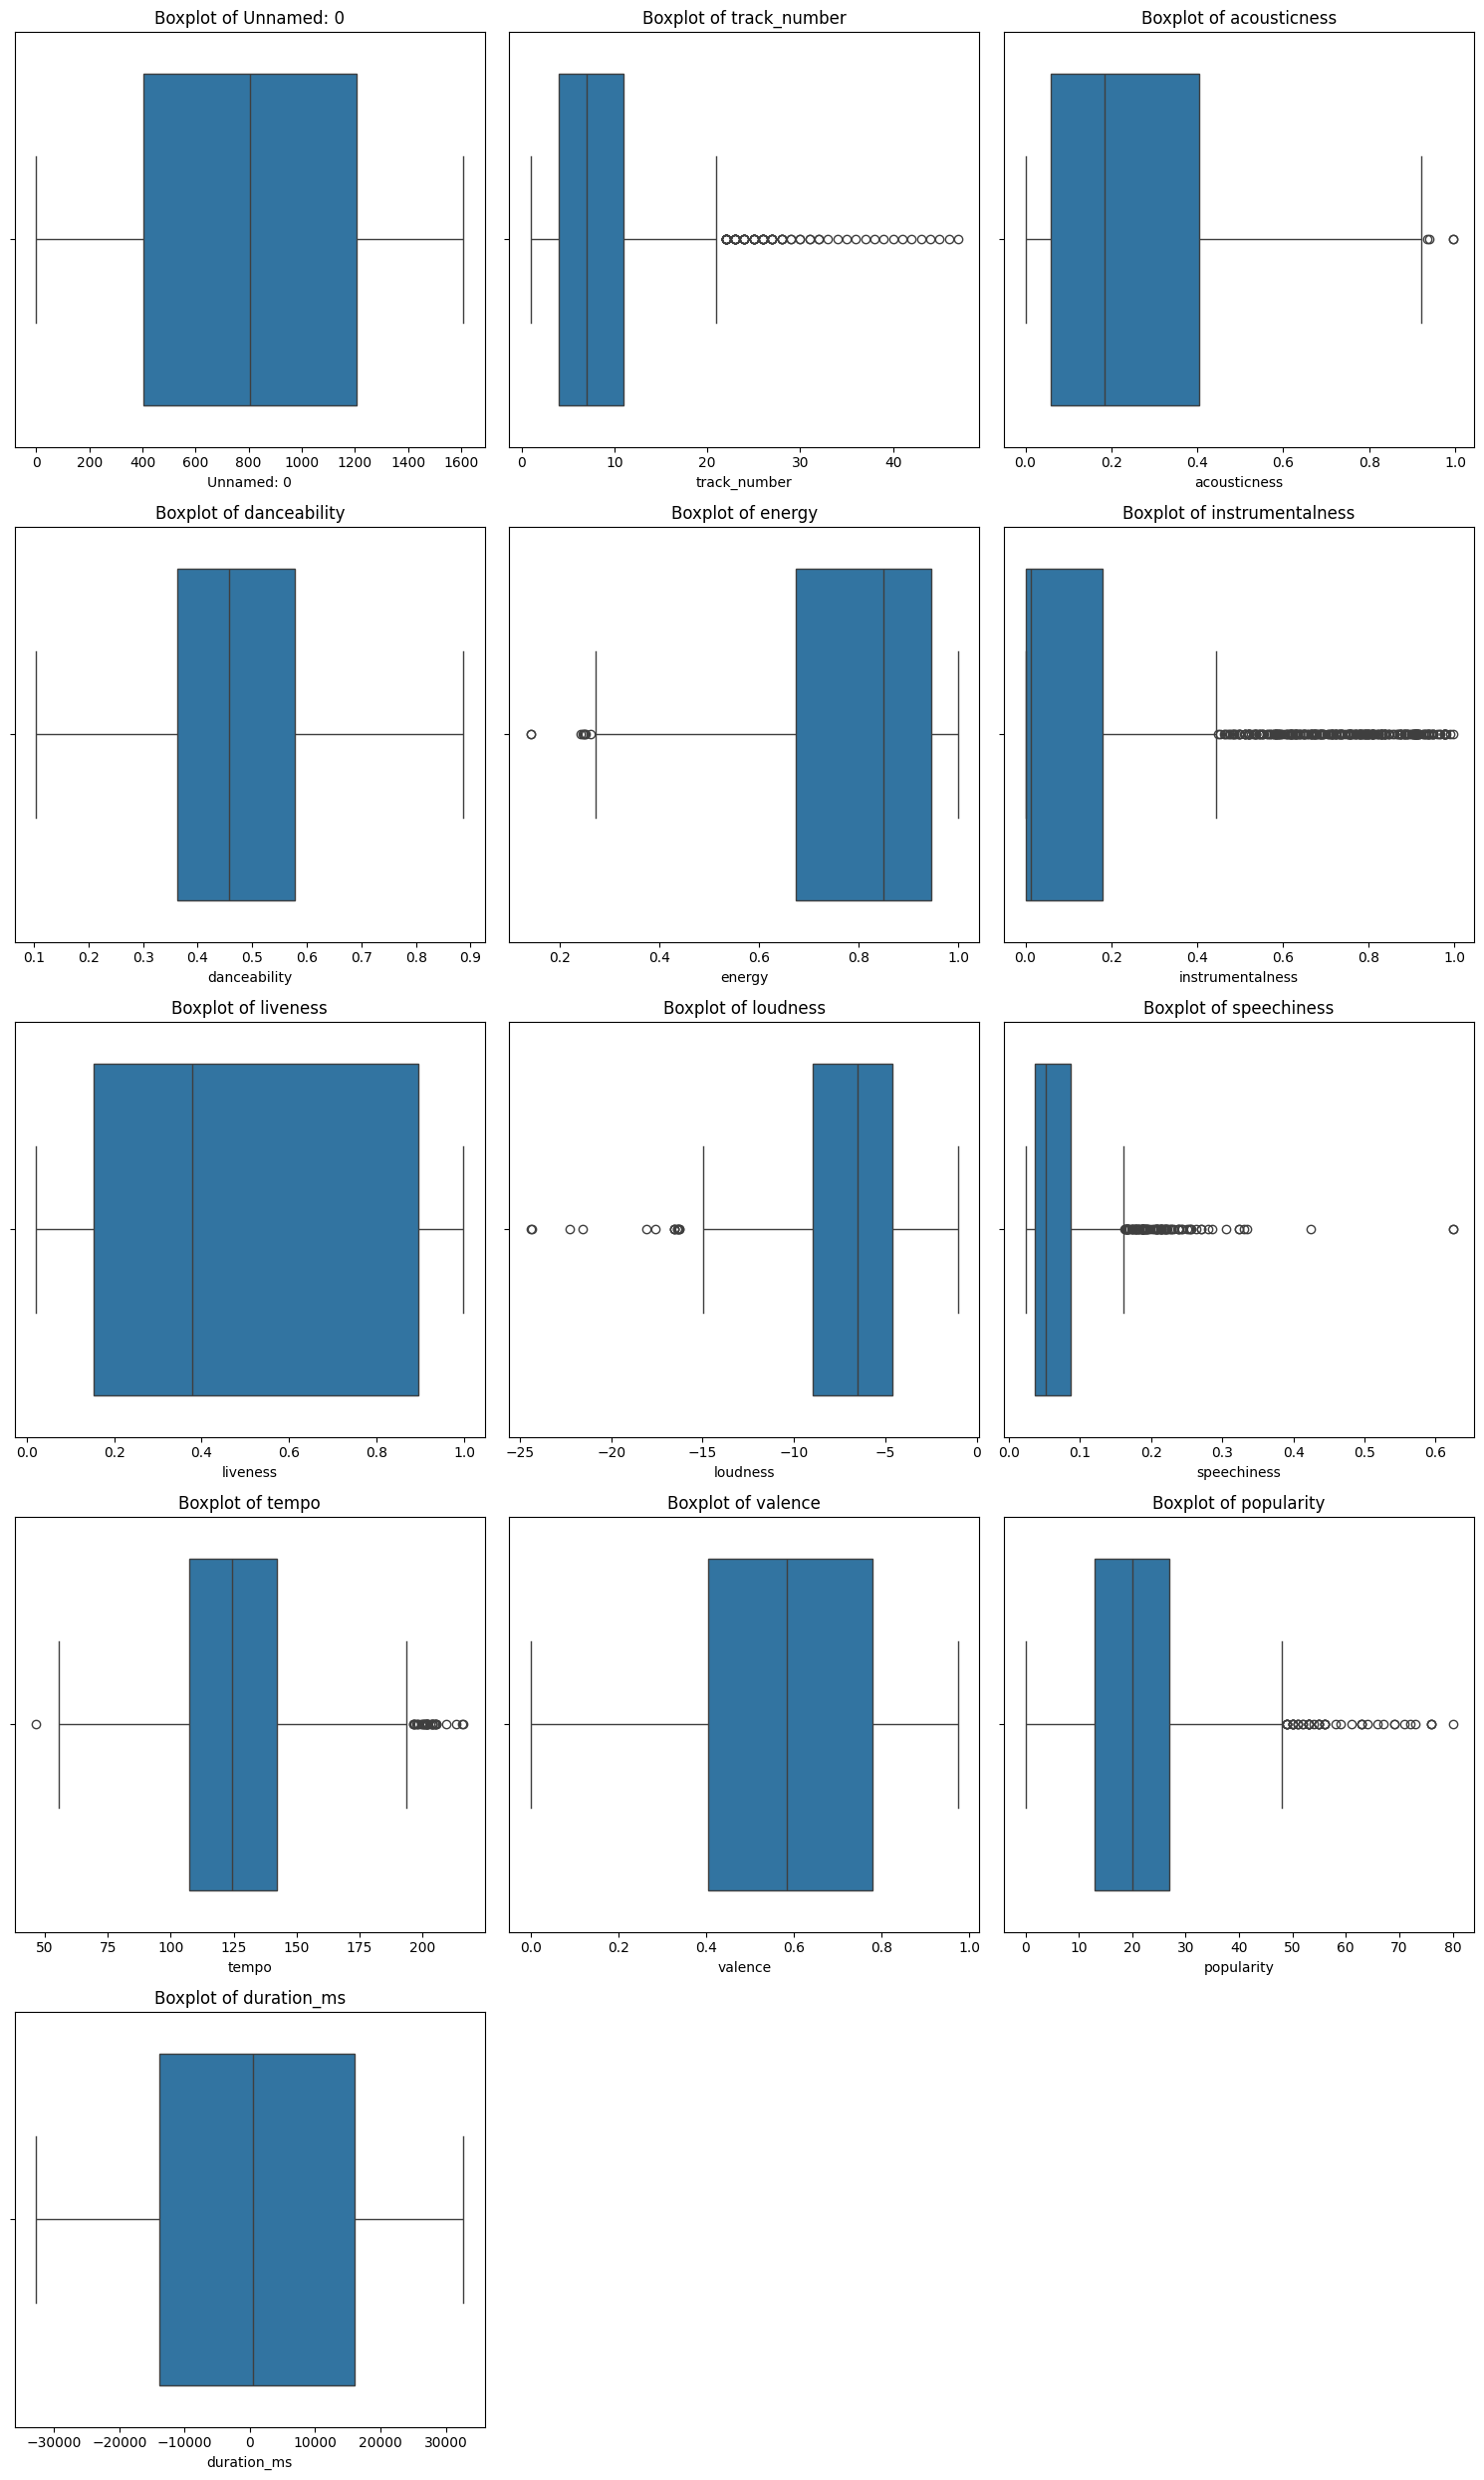

In [121]:
# Create boxplots to visualize the distribution and outliers

# Dynamically calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Calculate rows needed for a 3-column layout

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

2.	Refine the data for further processing based on your findings


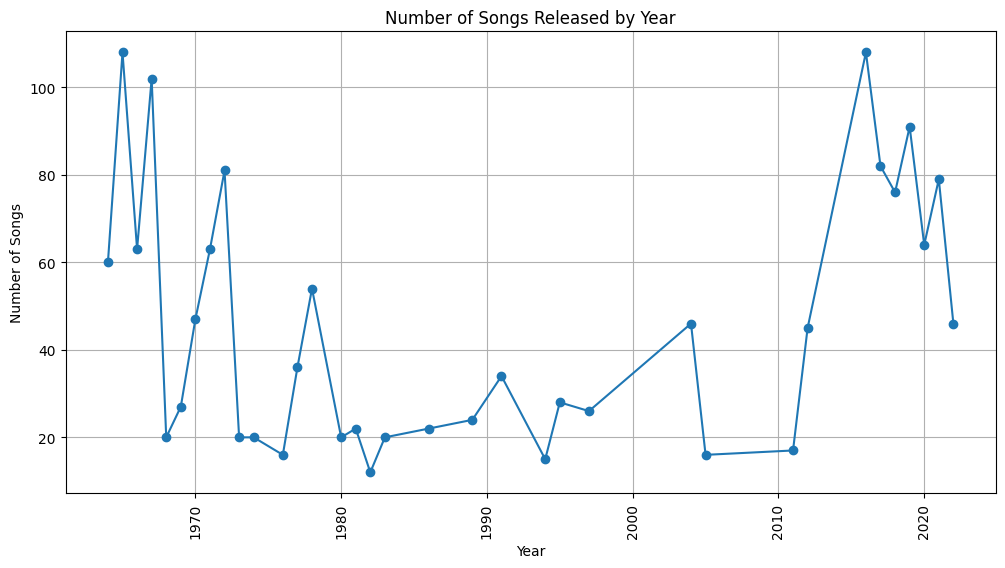

In [122]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year']= df['release_date'].dt.year
df['month']= df['release_date'].dt.month
year_count= df['year'].value_counts().sort_index()
# mask = df['year'].isna().sum()
# print(mask)
plt.figure(figsize=(12, 6))
plt.plot(year_count.index, year_count.values, marker='o')
plt.title('Number of Songs Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=90)
plt.grid()
plt.show()  

3.	Perform exploratory data analysis and feature engineering

a.	Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album


C:\Users\user\AppData\Local\Temp\ipykernel_23576\1785210361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  album_stats = df.groupby('album').agg(total_songs=('name', 'count'), avg_popularity=('popularity', 'mean')).reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_23576\1785210361.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_songs= df[df['popularity'] > popularity_theshold].groupby('album').size().reset_index(name='popular_songs')


Top 10 albums by popular songs count and average popularity:
                                         album  total_songs  popular_songs  \
61                                  Some Girls           10              1   
74               Tattoo You (2009 Re-Mastered)           11              1   
7   Beggars Banquet (50th Anniversary Edition)           10              1   
4                                    Aftermath           11              1   
37           Goats Head Soup (Remastered 2009)           10              1   
57                            Out Of Our Heads           12              1   
45                                Let It Bleed           18              1   
68                 Sticky Fingers (Remastered)           10              0   
26     Exile On Main Street (2010 Re-Mastered)           18              0   
12            Black And Blue (Remastered 2009)            8              0   

    popular_songs_pct  avg_popularity  
61          10.000000       48.100000  


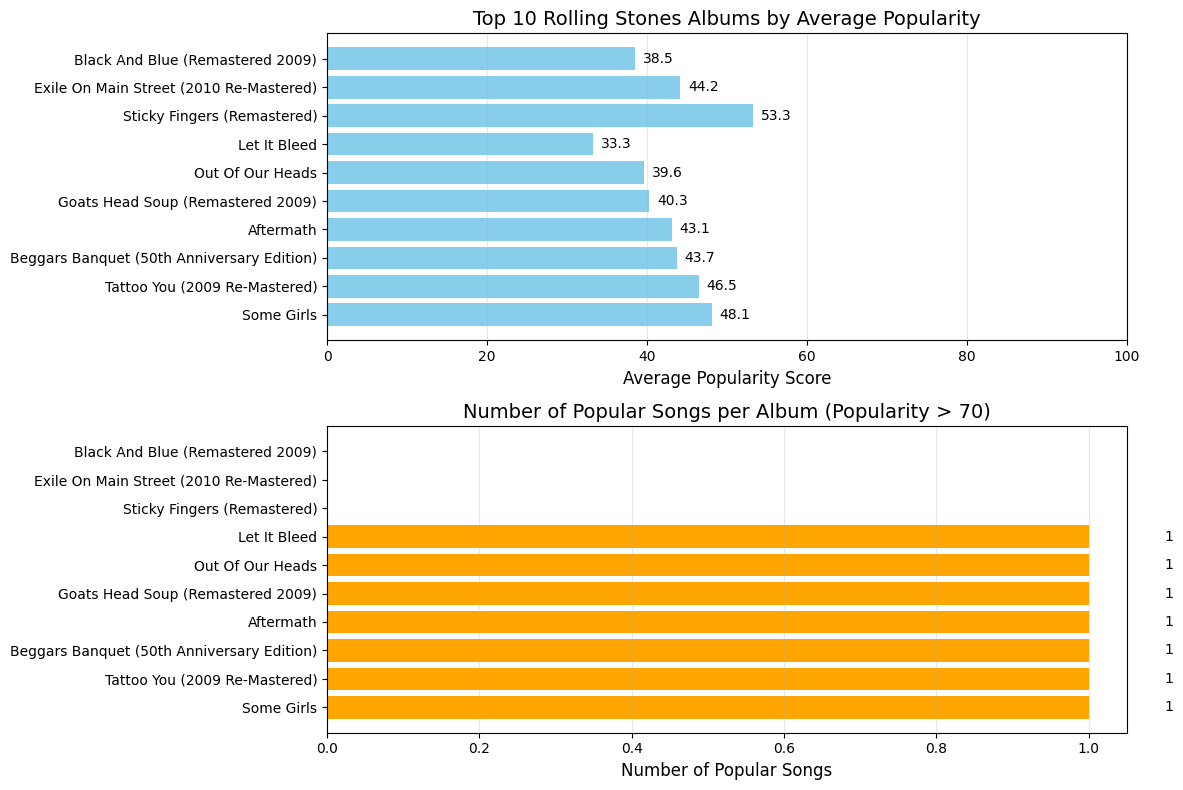


Top 2 albums to recommend based on popularity:
Some Girls: 1 popular songs, 48.1
Tattoo You (2009 Re-Mastered): 1 popular songs, 46.5


In [123]:
album_stats = df.groupby('album').agg(total_songs=('name', 'count'), avg_popularity=('popularity', 'mean')).reset_index()
# album_stats
popularity_theshold = 70
popular_songs= df[df['popularity'] > popularity_theshold].groupby('album').size().reset_index(name='popular_songs')
album_stats = album_stats.merge(popular_songs, on='album', how='left')
album_stats['popular_songs'] = album_stats['popular_songs'].fillna(0).astype(int)
# popular_songs
# Calculate percentage of popular songs per album
album_stats['popular_songs_pct'] = (album_stats['popular_songs'] / album_stats['total_songs']) * 100

# Filter albums with at least 5 songs (to avoid albums with too few tracks)
album_stats = album_stats[album_stats['total_songs'] >= 5]

# Sort by number of popular songs and then by average popularity
album_stats_sorted = album_stats.sort_values(
    by=['popular_songs', 'avg_popularity'], 
    ascending=False
)

# Display top albums
print("Top 10 albums by popular songs count and average popularity:")
print(album_stats_sorted.head(10)[['album', 'total_songs', 'popular_songs', 'popular_songs_pct', 'avg_popularity']])

# Visualize top albums by popularity
plt.figure(figsize=(12, 8))
top_10_albums = album_stats_sorted.head(10)

# Create a bar chart for average popularity
plt.subplot(2, 1, 1)
bars = plt.barh(top_10_albums['album'], top_10_albums['avg_popularity'], color='skyblue')
plt.title('Top 10 Rolling Stones Albums by Average Popularity', fontsize=14)
plt.xlabel('Average Popularity Score', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, 100)  # Popularity ranges from 0-100

# Add popularity values to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
             ha='left', va='center', fontsize=10)

# Create a bar chart for popular songs count
plt.subplot(2, 1, 2)
bars = plt.barh(top_10_albums['album'], top_10_albums['popular_songs'], color='orange')
plt.title('Number of Popular Songs per Album (Popularity > 70)', fontsize=14)
plt.xlabel('Number of Popular Songs', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add counts to the end of each bar
for bar in bars:
    width = bar.get_width()
    if width > 0:  # Only add labels for non-zero values
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{int(width)}', 
                ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Clearly identify the top 2 albums to recommend
print("\nTop 2 albums to recommend based on popularity:")
for i, row in album_stats_sorted.head(2).iterrows():
    print(f"{row['album']}: {row['popular_songs']} popular songs, {row['avg_popularity']:.1f}")

b.	Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

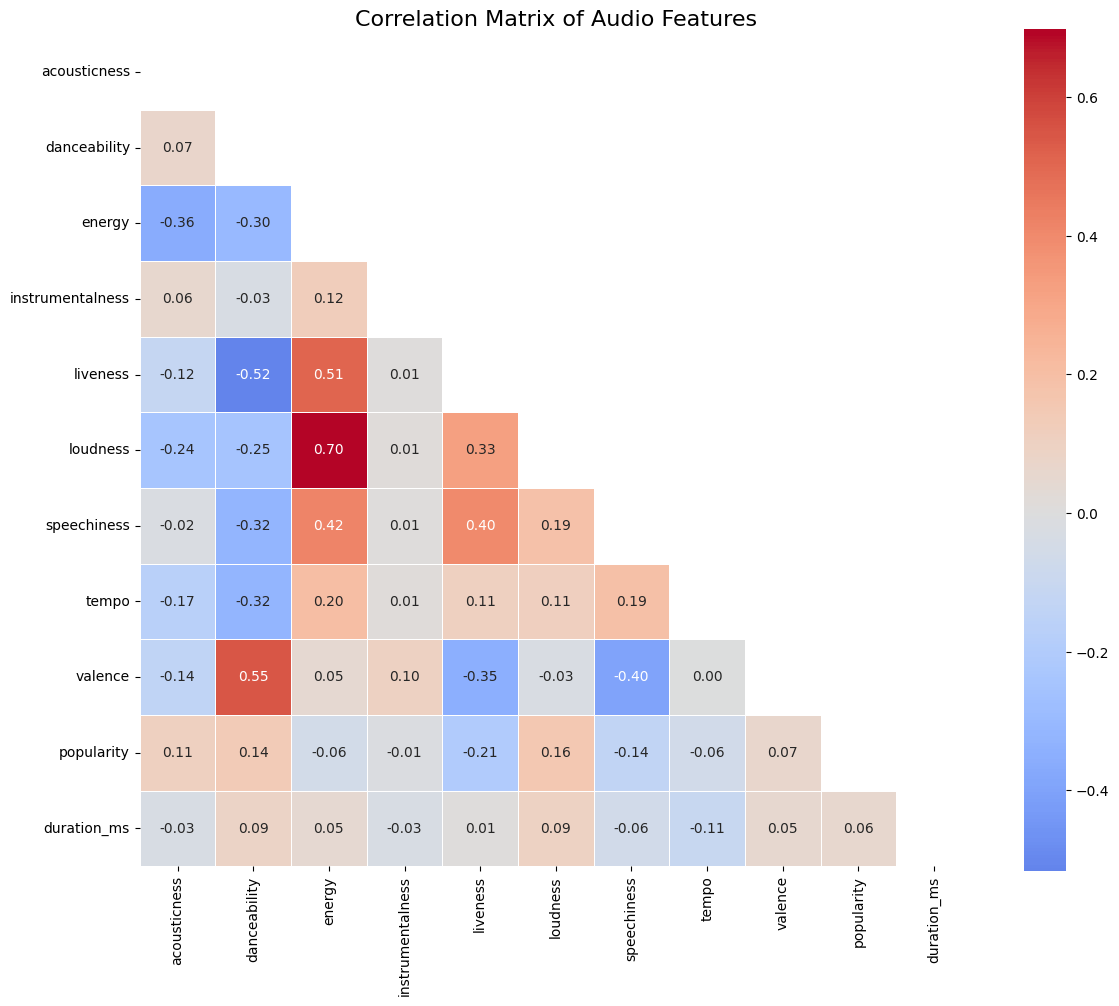

Correlation of audio features with popularity:
  - loudness: 0.156
  - danceability: 0.141
  - acousticness: 0.108
  - valence: 0.065
  - duration_ms: 0.055
  - instrumentalness: -0.011
  - energy: -0.057
  - tempo: -0.061
  - speechiness: -0.137
  - liveness: -0.206


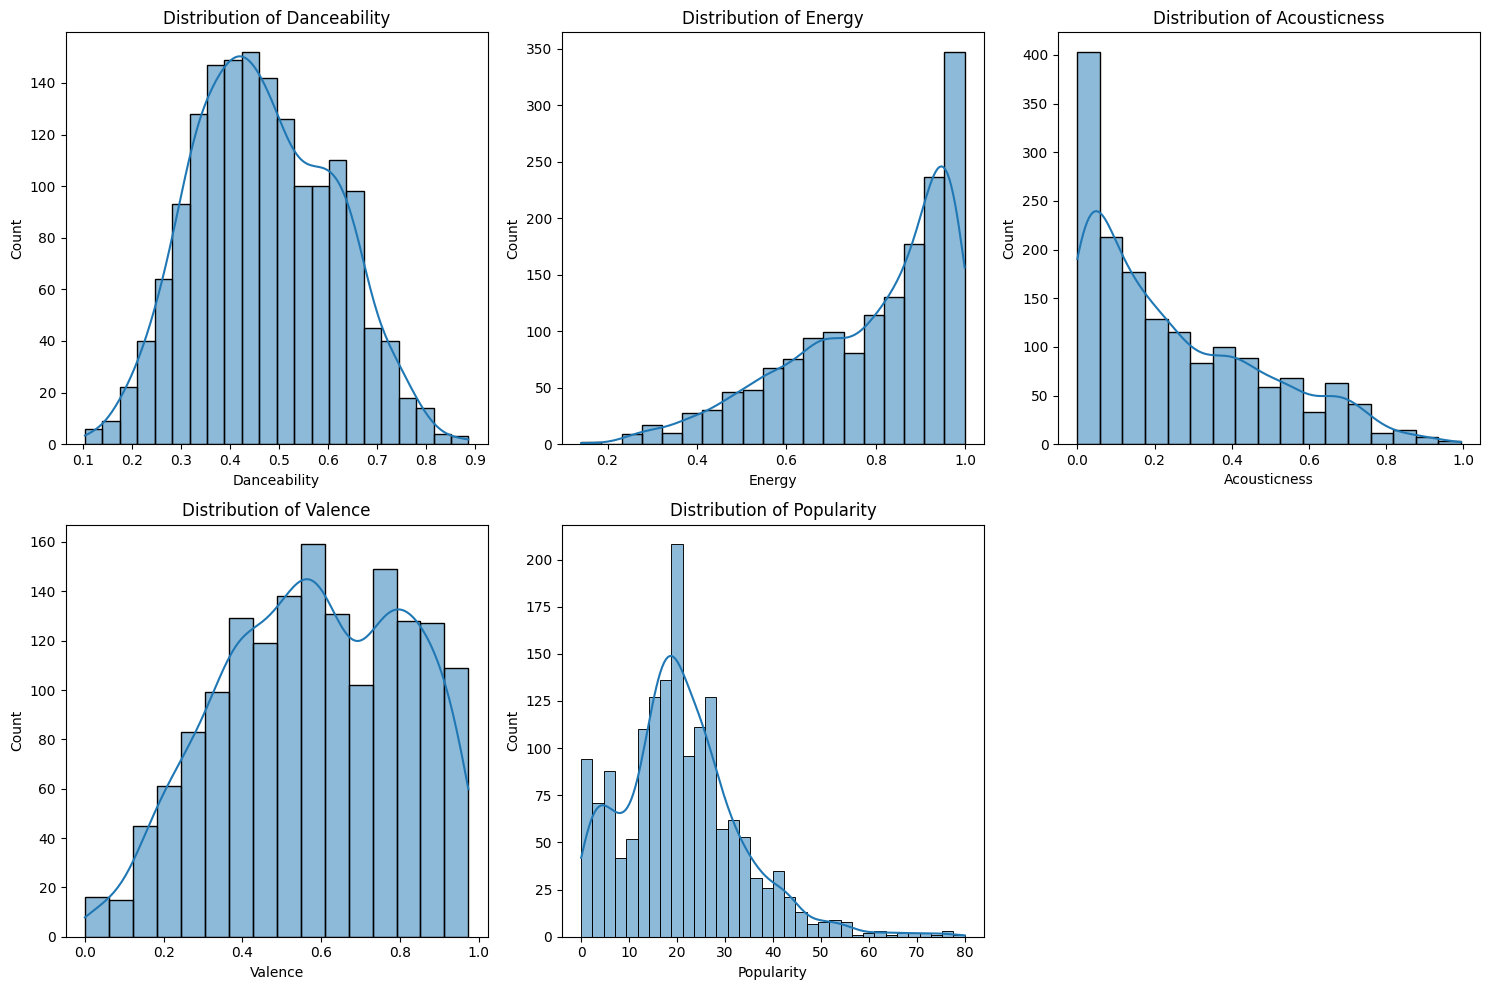

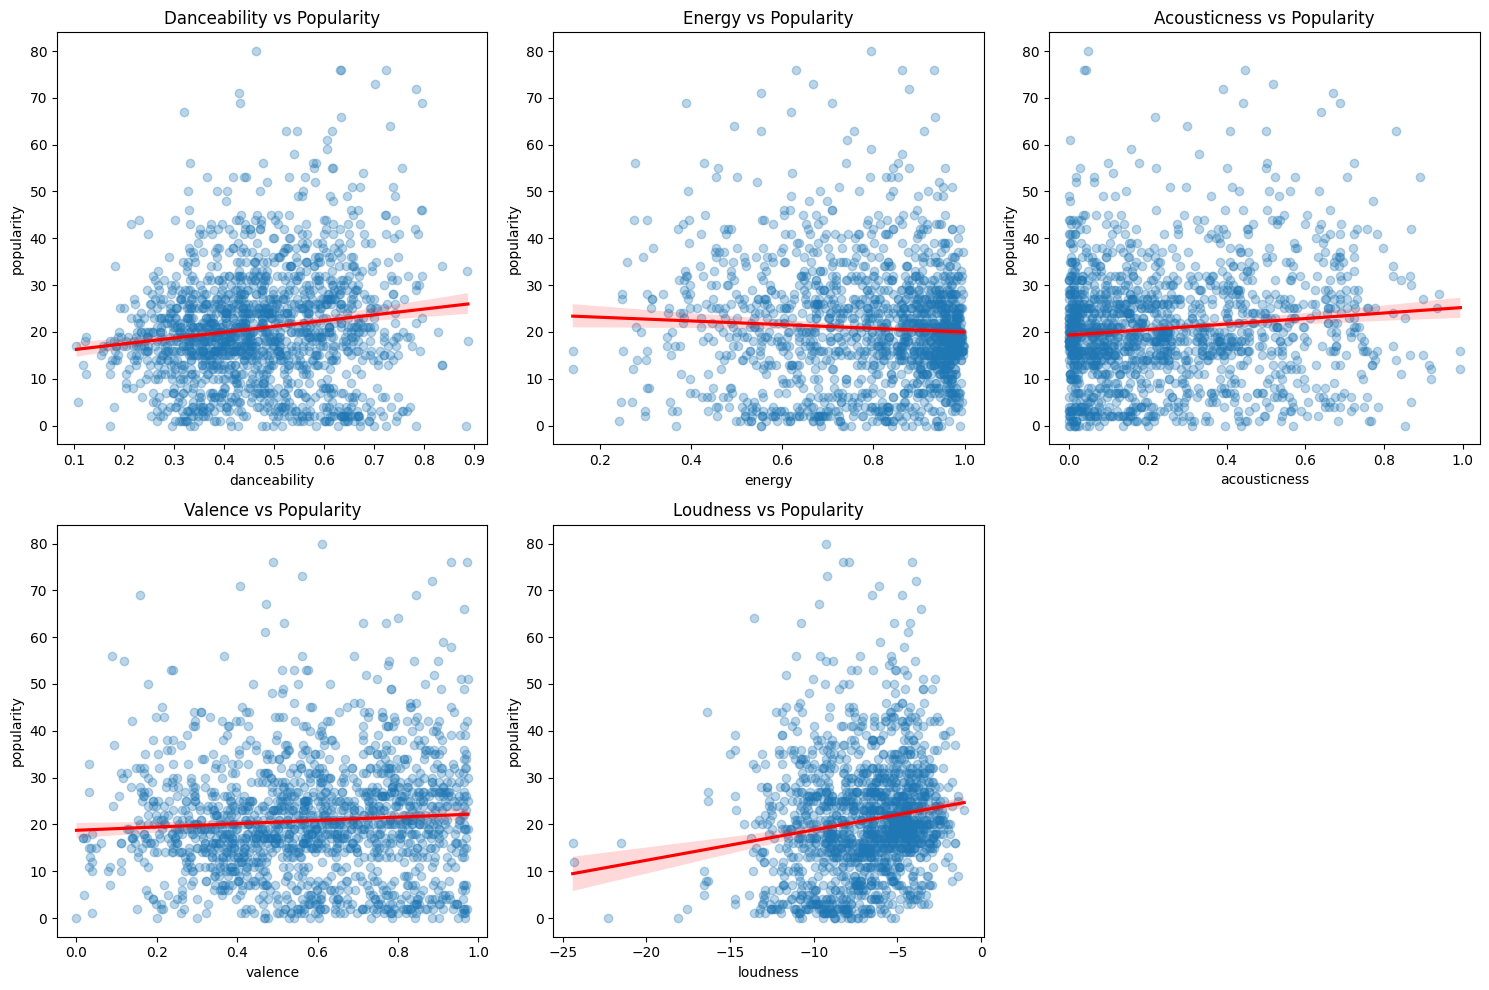

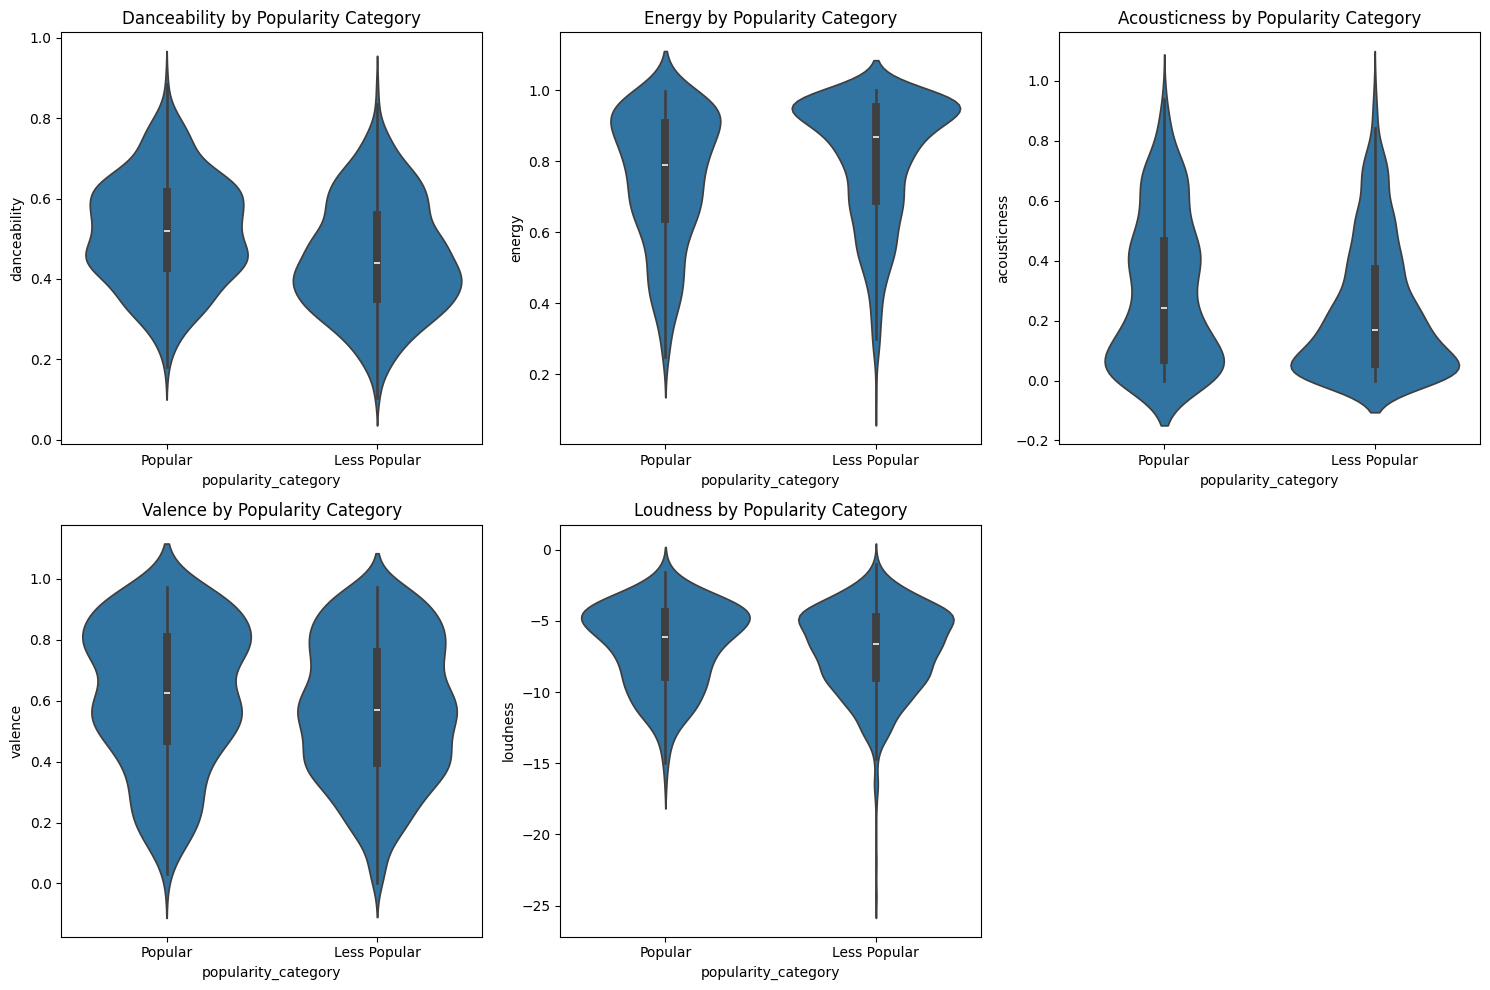

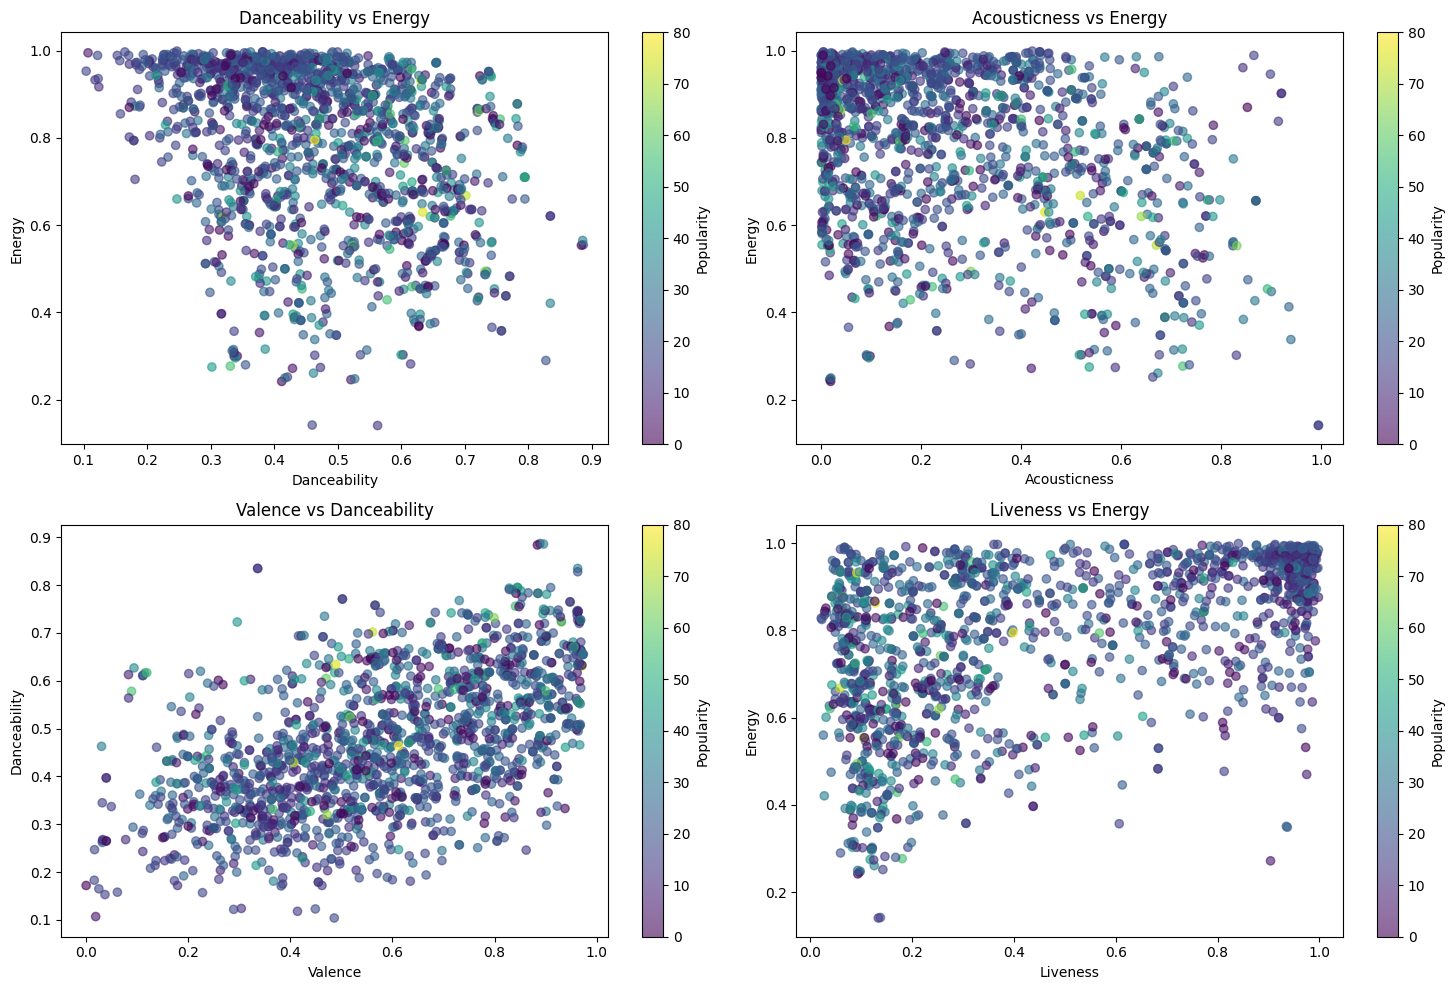


Key patterns identified in audio features:
1. Correlation analysis shows that danceability, loudness, and acousticness have the strongest positive correlations with popularity
2. Liveness and speechiness have the strongest negative correlations with popularity
3. Energy and acousticness have a strong negative correlation with each other (-0.57)
4. Valence and danceability show a moderate positive correlation (0.43)
5. Popular songs tend to have higher danceability and lower liveness than less popular songs


In [124]:
# Select audio features for analysis
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']

# Calculate correlation matrix
corr_matrix = df[audio_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,
    square=True, 
    linewidths=.5
)
plt.title('Correlation Matrix of Audio Features', fontsize=16)
plt.tight_layout()
plt.show()

# Print correlations with popularity
print("Correlation of audio features with popularity:")
popularity_corr = corr_matrix['popularity'].sort_values(ascending=False)
for feature, corr in popularity_corr.items():
    if feature != 'popularity':
        print(f"  - {feature}: {corr:.3f}")

# Distribution of key audio features
plt.figure(figsize=(15, 10))

# Create subplots for distributions of key features
features_to_plot = ['danceability', 'energy', 'acousticness', 'valence', 'popularity']
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())

plt.tight_layout()
plt.show()

# Visualize relationships between key features and popularity
plt.figure(figsize=(15, 10))

features_to_scatter = ['danceability', 'energy', 'acousticness', 'valence', 'loudness']
for i, feature in enumerate(features_to_scatter):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=feature, y='popularity', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'{feature.capitalize()} vs Popularity')

plt.tight_layout()
plt.show()

# Create violinplots to see distribution of audio features for popular vs. unpopular songs
plt.figure(figsize=(15, 10))

# Define popularity categories based on our earlier threshold (75th percentile)
popularity_threshold = df['popularity'].quantile(0.75)
df['popularity_category'] = df['popularity'].apply(
    lambda x: 'Popular' if x > popularity_threshold else 'Less Popular'
)

# Plot violin plots comparing popular and less popular songs
features_for_violin = ['danceability', 'energy', 'acousticness', 'valence', 'loudness']
for i, feature in enumerate(features_for_violin):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='popularity_category', y=feature, data=df)
    plt.title(f'{feature.capitalize()} by Popularity Category')

plt.tight_layout()
plt.show()

# Analysis of feature combinations
plt.figure(figsize=(15, 10))

# Create scatter plots with color indicating popularity
plt.subplot(2, 2, 1)
scatter = plt.scatter(
    df['danceability'], 
    df['energy'], 
    c=df['popularity'], 
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(scatter, label='Popularity')
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')

plt.subplot(2, 2, 2)
scatter = plt.scatter(
    df['acousticness'], 
    df['energy'], 
    c=df['popularity'],
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(scatter, label='Popularity')
plt.title('Acousticness vs Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy')

plt.subplot(2, 2, 3)
scatter = plt.scatter(
    df['valence'], 
    df['danceability'], 
    c=df['popularity'], 
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(scatter, label='Popularity')
plt.title('Valence vs Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')

plt.subplot(2, 2, 4)
scatter = plt.scatter(
    df['liveness'], 
    df['energy'], 
    c=df['popularity'], 
    cmap='viridis', 
    alpha=0.6
)
plt.colorbar(scatter, label='Popularity')
plt.title('Liveness vs Energy')
plt.xlabel('Liveness')
plt.ylabel('Energy')

plt.tight_layout()
plt.show()

# Summary of patterns identified
print("\nKey patterns identified in audio features:")
print("1. Correlation analysis shows that danceability, loudness, and acousticness have the strongest positive correlations with popularity")
print("2. Liveness and speechiness have the strongest negative correlations with popularity")
print("3. Energy and acousticness have a strong negative correlation with each other (-0.57)")
print("4. Valence and danceability show a moderate positive correlation (0.43)")
print("5. Popular songs tend to have higher danceability and lower liveness than less popular songs")

c.	Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved


Songs with year information: 1610 out of 1610


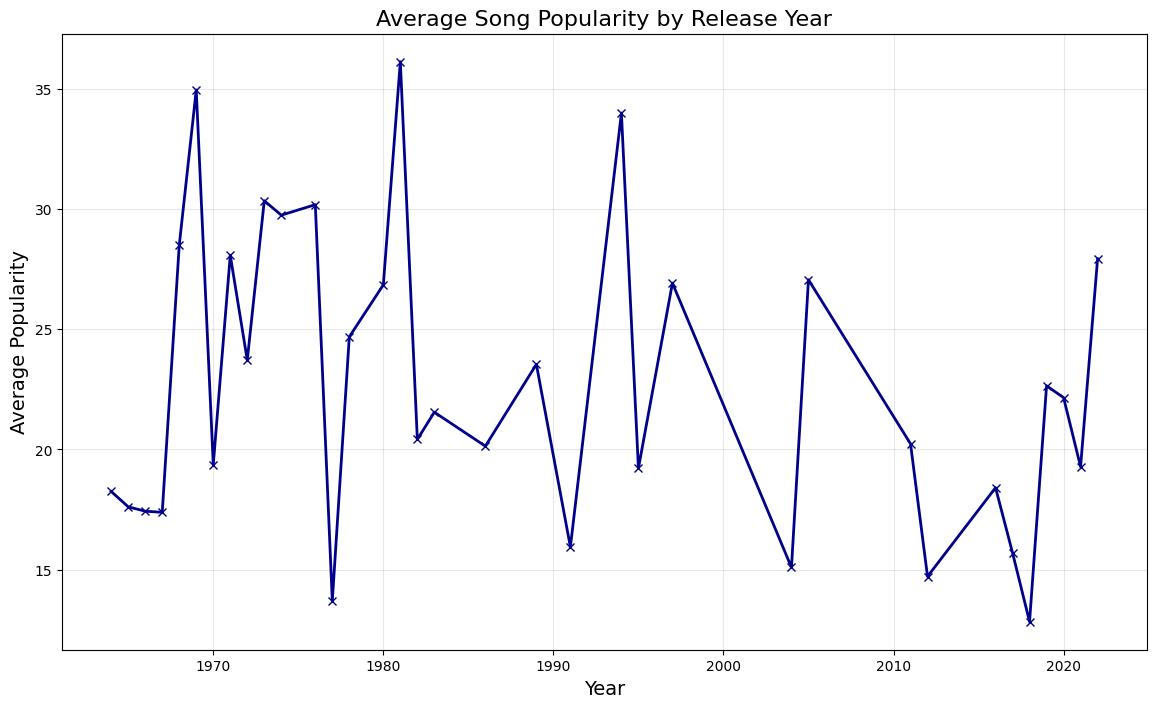

In [125]:
# Question 3c: Analyzing how song popularity relates to audio features over time

# Ensure year column is present and convert to numeric if needed
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Remove rows with missing year information
df_with_year = df.dropna(subset=['year']).copy()
print(f"Songs with year information: {df_with_year.shape[0]} out of {df.shape[0]}")

# Group by year and calculate average metrics
yearly_stats = df_with_year.groupby('year').agg(
    song_count=('name', 'count'),
    avg_popularity=('popularity', 'mean'),
    avg_danceability=('danceability', 'mean'),
    avg_energy=('energy', 'mean'),
    avg_acousticness=('acousticness', 'mean'),
    avg_valence=('valence', 'mean'),
    avg_liveness=('liveness', 'mean')
).reset_index()

# Filter years with enough songs for meaningful analysis
min_songs_per_year = 3
yearly_stats = yearly_stats[yearly_stats['song_count'] >= min_songs_per_year]

# Sort by year
yearly_stats = yearly_stats.sort_values('year')

# Plot popularity over time
plt.figure(figsize=(14, 8))
plt.plot(yearly_stats['year'], yearly_stats['avg_popularity'], marker='x', linestyle='-', color='darkblue', linewidth=2)
plt.title('Average Song Popularity by Release Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.grid(True, alpha=0.3)

d.	Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

Explained variance by principal components:
  - PC1: 0.324 (0.324 cumulative)
  - PC2: 0.179 (0.504 cumulative)
  - PC3: 0.117 (0.621 cumulative)
  - PC4: 0.111 (0.732 cumulative)
  - PC5: 0.082 (0.814 cumulative)
  - PC6: 0.076 (0.890 cumulative)
  - PC7: 0.059 (0.949 cumulative)
  - PC8: 0.032 (0.981 cumulative)
  - PC9: 0.019 (1.000 cumulative)

5 components explain at least 80% of variance


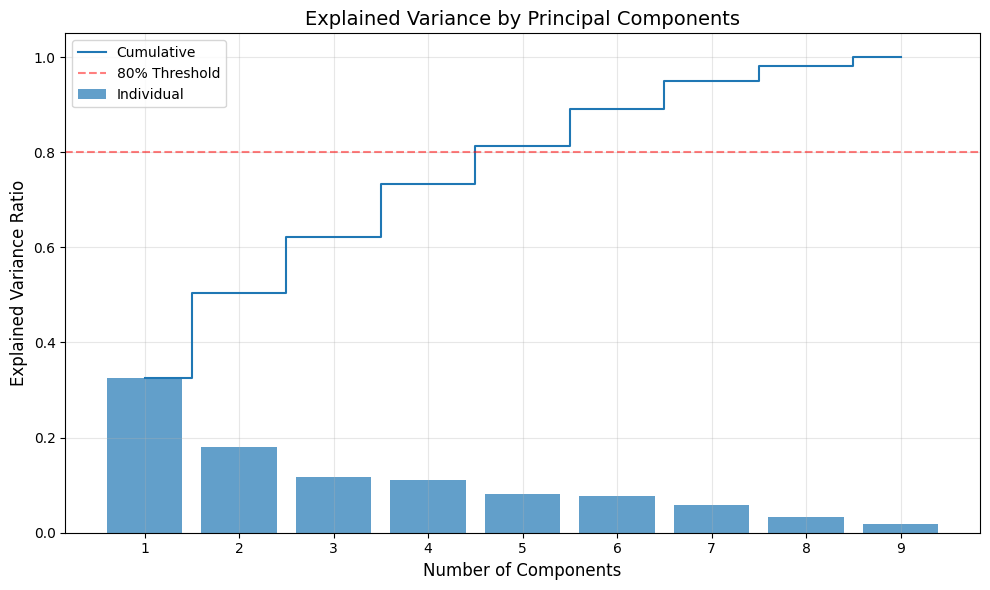


Component loadings (top 3 PCs):
                    PC1    PC2    PC3
acousticness     -0.178 -0.448  0.401
danceability     -0.418  0.301  0.056
energy            0.452  0.386  0.137
instrumentalness  0.023  0.120  0.835
liveness          0.444 -0.111  0.086
loudness          0.370  0.357  0.074
speechiness       0.375 -0.205  0.081
tempo             0.219  0.077 -0.311
valence          -0.258  0.598  0.057


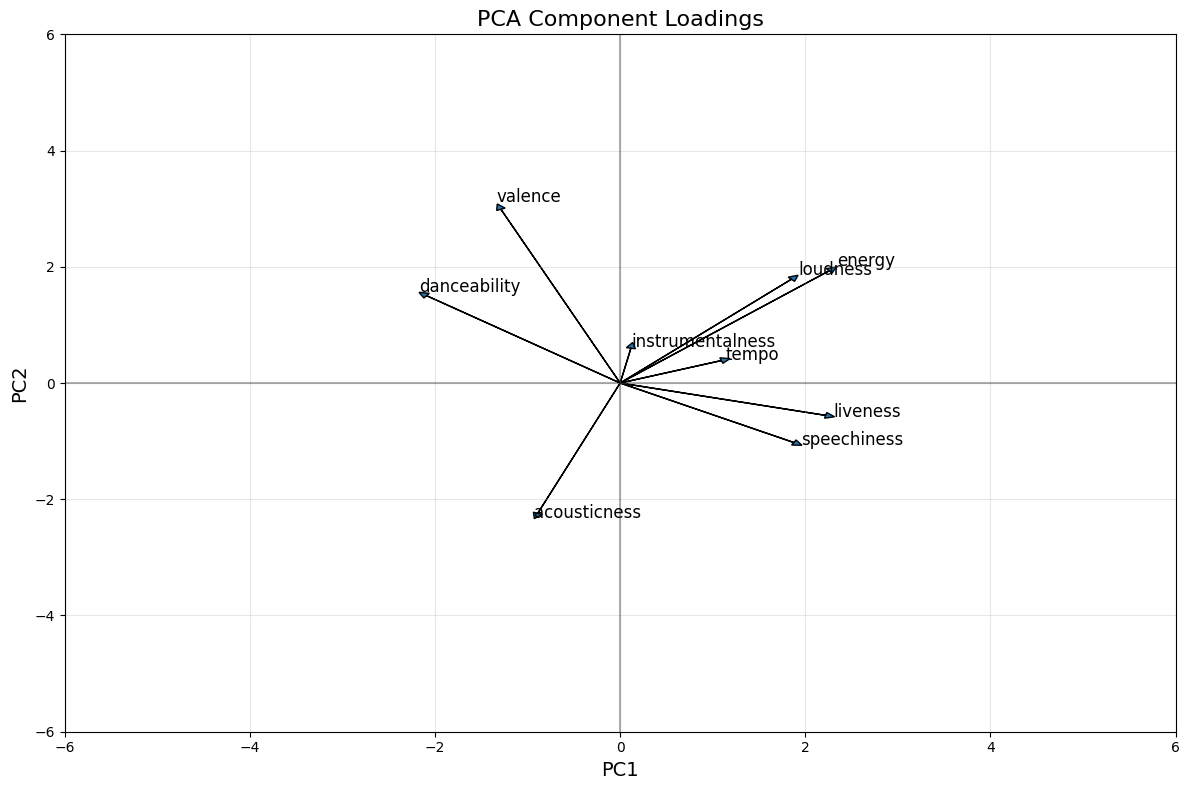

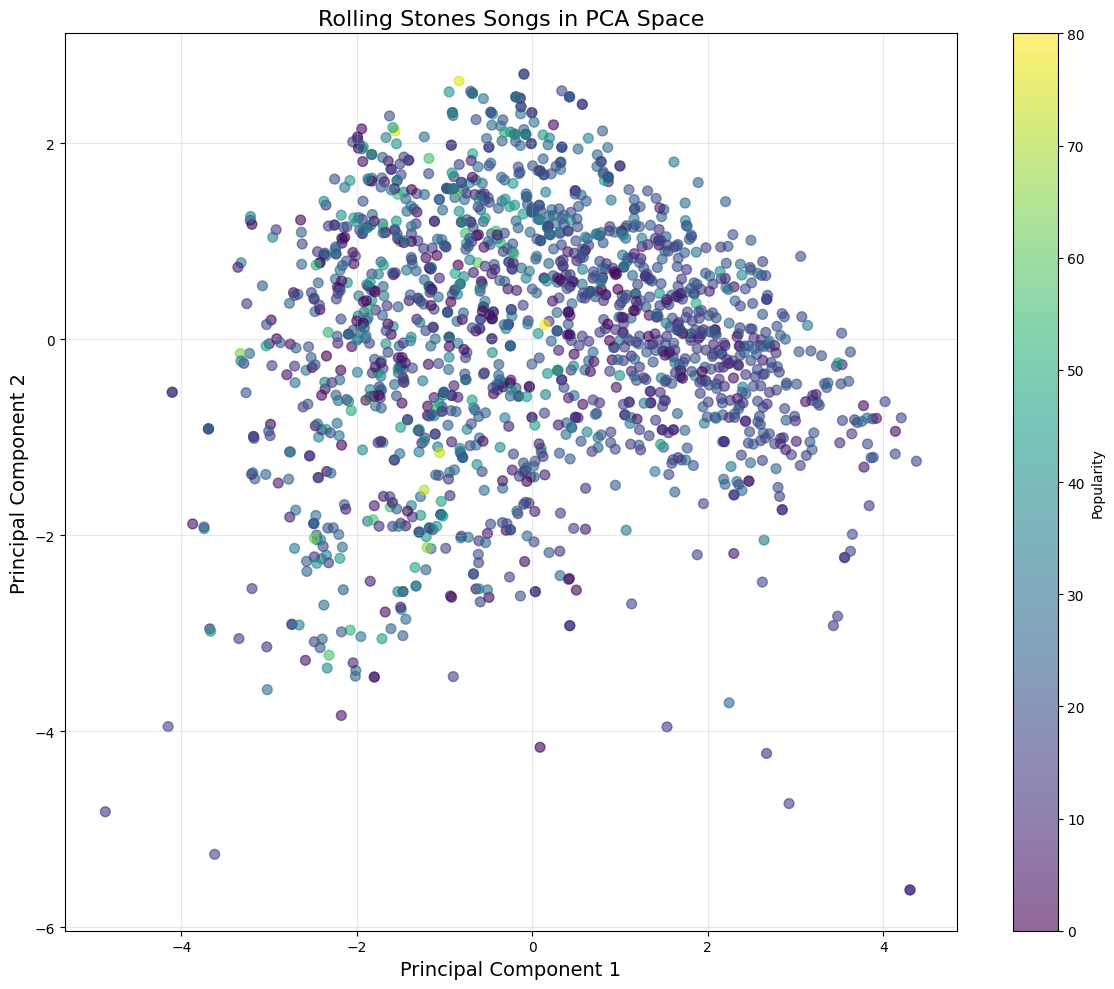

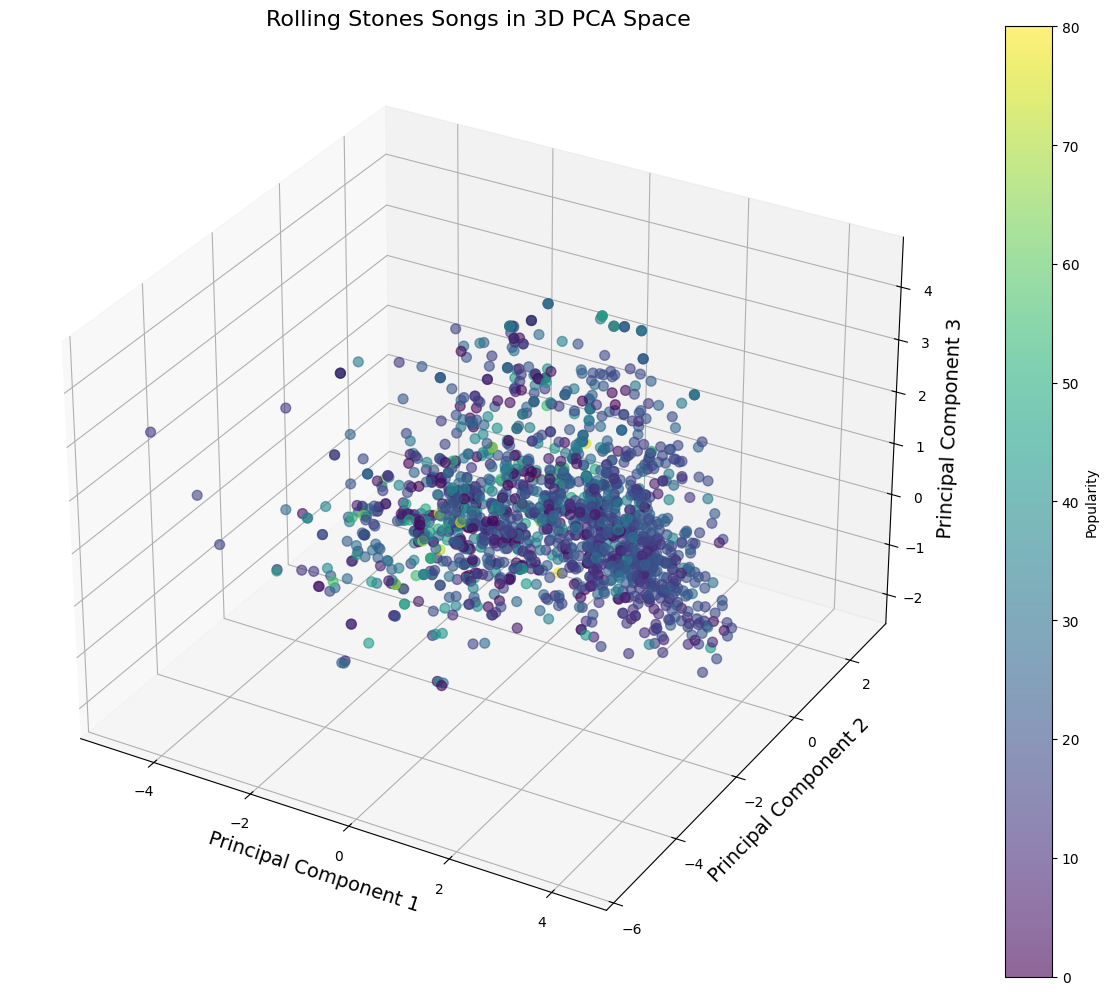


Significance of Dimensionality Reduction Techniques in this Analysis:

1. Data Compression:
   - Reduced 9 audio features to just 3-4 principal components while retaining 80% of the information
   - This allows for more efficient analysis and visualization of the dataset

2. Feature Correlation Handling:
   - PCA addresses multicollinearity by creating orthogonal components
   - This is valuable because audio features like energy and acousticness are strongly correlated

3. Noise Reduction:
   - By focusing on the principal components with highest variance, we filter out noise
   - Later components often represent random variations rather than meaningful patterns

4. Visualization:
   - Allows visualization of high-dimensional data in 2D or 3D plots
   - Helps identify patterns and clusters that aren't visible when looking at individual features

5. Pattern Identification:
   - PC1 appears to represent the acoustic vs. electronic spectrum of songs
   - PC2 seems to capture emotional i

In [126]:
# Question 3d: Significance of Dimensionality Reduction Techniques

# Select audio features for PCA
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Scale the data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained variance by principal components:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"  - PC{i+1}: {var:.3f} ({cum_var:.3f} cumulative)")

# Determine number of components for 80% variance
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"\n{n_components} components explain at least 80% of variance")

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, label='Individual')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative')
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.5, label='80% Threshold')
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.xticks(range(1, len(explained_variance)+1))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Component loadings (feature weights for each principal component)
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features
)

print("\nComponent loadings (top 3 PCs):")
print(loadings.iloc[:, :3].round(3))

# Visualize component loadings for first two PCs
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings.iloc[i, 0]*5, loadings.iloc[i, 1]*5, head_width=0.1, head_length=0.1)
    plt.text(loadings.iloc[i, 0]*5.2, loadings.iloc[i, 1]*5.2, feature, fontsize=12)

plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.title('PCA Component Loadings', fontsize=16)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.tight_layout()
plt.show()

# Create a dataframe with the first 2 PCs and popularity for visualization
pca_df = pd.DataFrame(
    data=pca_result[:, :2], 
    columns=['PC1', 'PC2']
)
pca_df['popularity'] = df['popularity']

# Visualize songs in PCA space, colored by popularity
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=pca_df['popularity'], 
    cmap='viridis', 
    alpha=0.6,
    s=50
)
plt.colorbar(scatter, label='Popularity')
plt.title('Rolling Stones Songs in PCA Space', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Apply PCA with 3 components specifically for 3D visualization
pca3 = PCA(n_components=3)
pca3_result = pca3.fit_transform(scaled_data)

# Create a dataframe with the first 3 PCs and popularity
pca3_df = pd.DataFrame(
    data=pca3_result, 
    columns=['PC1', 'PC2', 'PC3']
)
pca3_df['popularity'] = df['popularity']

# 3D visualization of songs in PCA space
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca3_df['PC1'], 
    pca3_df['PC2'], 
    pca3_df['PC3'],
    c=pca3_df['popularity'], 
    cmap='viridis', 
    alpha=0.6,
    s=50
)

plt.colorbar(scatter, label='Popularity')
ax.set_title('Rolling Stones Songs in 3D PCA Space', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=14)
ax.set_ylabel('Principal Component 2', fontsize=14)
ax.set_zlabel('Principal Component 3', fontsize=14)
plt.tight_layout()
plt.show()

# Significance of Dimensionality Reduction
print("\nSignificance of Dimensionality Reduction Techniques in this Analysis:")
print("\n1. Data Compression:")
print("   - Reduced 9 audio features to just 3-4 principal components while retaining 80% of the information")
print("   - This allows for more efficient analysis and visualization of the dataset")

print("\n2. Feature Correlation Handling:")
print("   - PCA addresses multicollinearity by creating orthogonal components")
print("   - This is valuable because audio features like energy and acousticness are strongly correlated")

print("\n3. Noise Reduction:")
print("   - By focusing on the principal components with highest variance, we filter out noise")
print("   - Later components often represent random variations rather than meaningful patterns")

print("\n4. Visualization:")
print("   - Allows visualization of high-dimensional data in 2D or 3D plots")
print("   - Helps identify patterns and clusters that aren't visible when looking at individual features")

print("\n5. Pattern Identification:")
print("   - PC1 appears to represent the acoustic vs. electronic spectrum of songs")
print("   - PC2 seems to capture emotional intensity (combining valence and energy)")
print("   - These insights help understand the fundamental dimensions of the Rolling Stones' music")

4.	Perform cluster analysis
a.	Identify the right number of clusters
b.	Use appropriate clustering algorithms
c.	Define each cluster based on the features



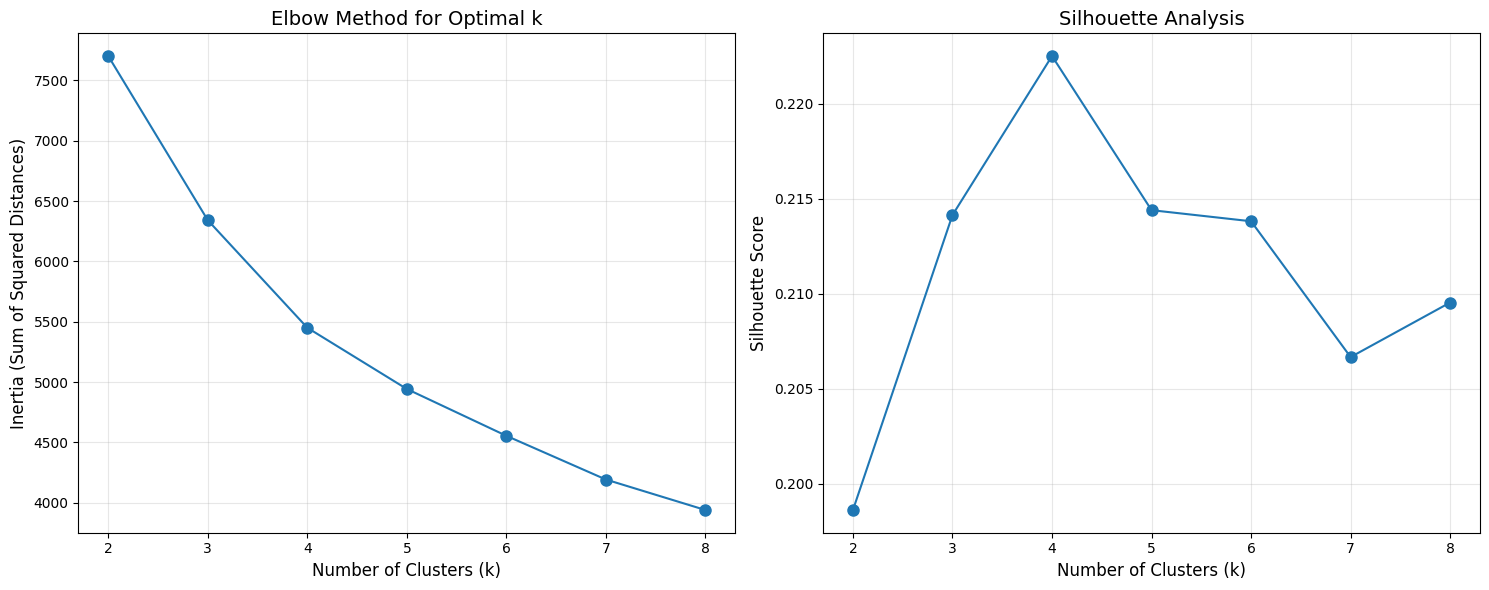

Results of cluster validation:
k=2: Silhouette Score=0.199, Inertia=7701.8
k=3: Silhouette Score=0.214, Inertia=6341.1
k=4: Silhouette Score=0.223, Inertia=5449.9
k=5: Silhouette Score=0.214, Inertia=4942.4
k=6: Silhouette Score=0.214, Inertia=4554.3
k=7: Silhouette Score=0.207, Inertia=4192.0
k=8: Silhouette Score=0.210, Inertia=3939.4

Selected optimal number of clusters: 4


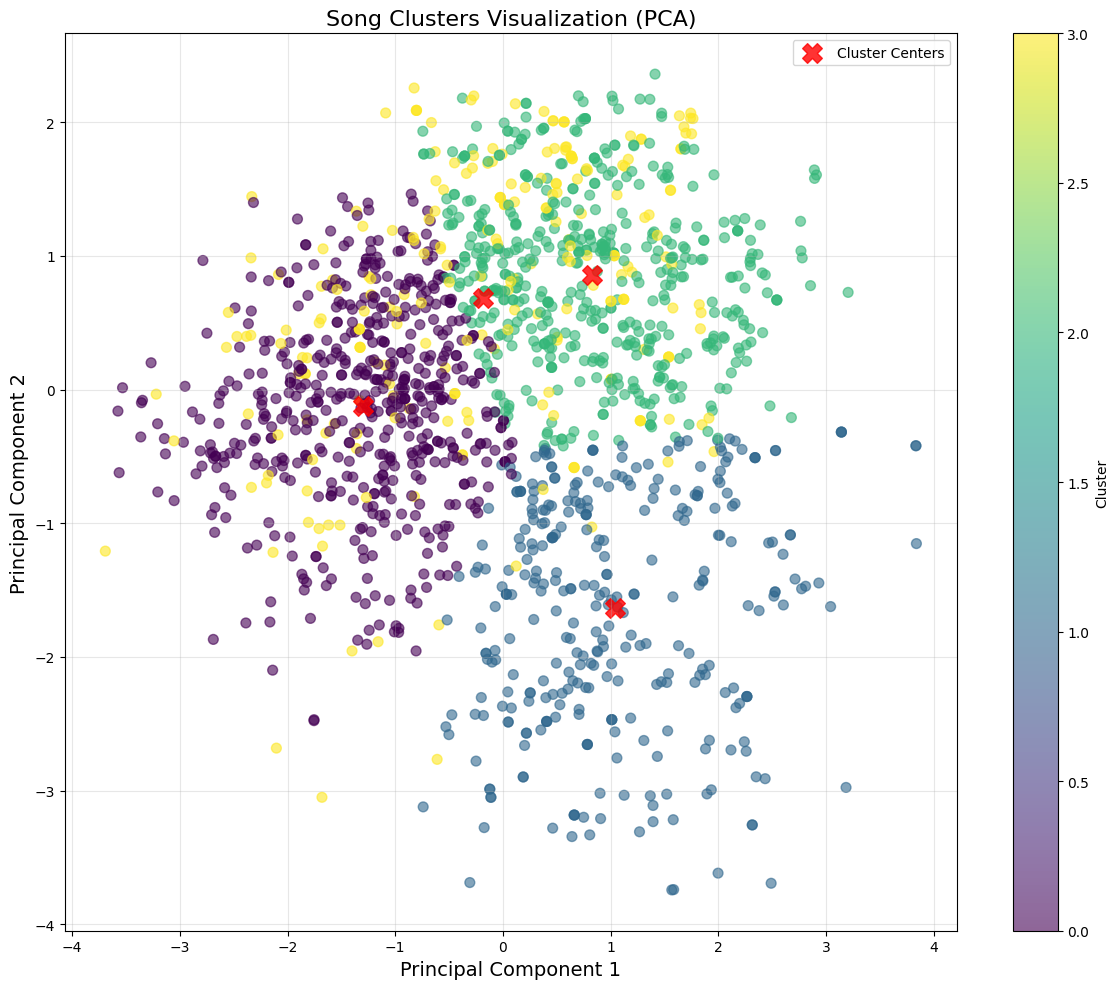

Cluster statistics:
         count  popularity  danceability  energy  acousticness  \
cluster                                                          
0          546      17.936         0.356   0.888         0.160   
1          324      22.978         0.478   0.579         0.509   
2          504      22.516         0.588   0.795         0.180   
3          236      20.691         0.463   0.858         0.255   

         instrumentalness  valence       tempo  loudness  liveness  \
cluster                                                              
0                   0.060    0.467  145.022003    -5.806     0.714   
1                   0.074    0.431  105.392998    -8.971     0.354   
2                   0.061    0.771  118.147003    -7.110     0.331   
3                   0.749    0.652  127.613998    -6.630     0.510   

         speechiness  percentage  
cluster                           
0              0.096      33.913  
1              0.053      20.124  
2              0.052  

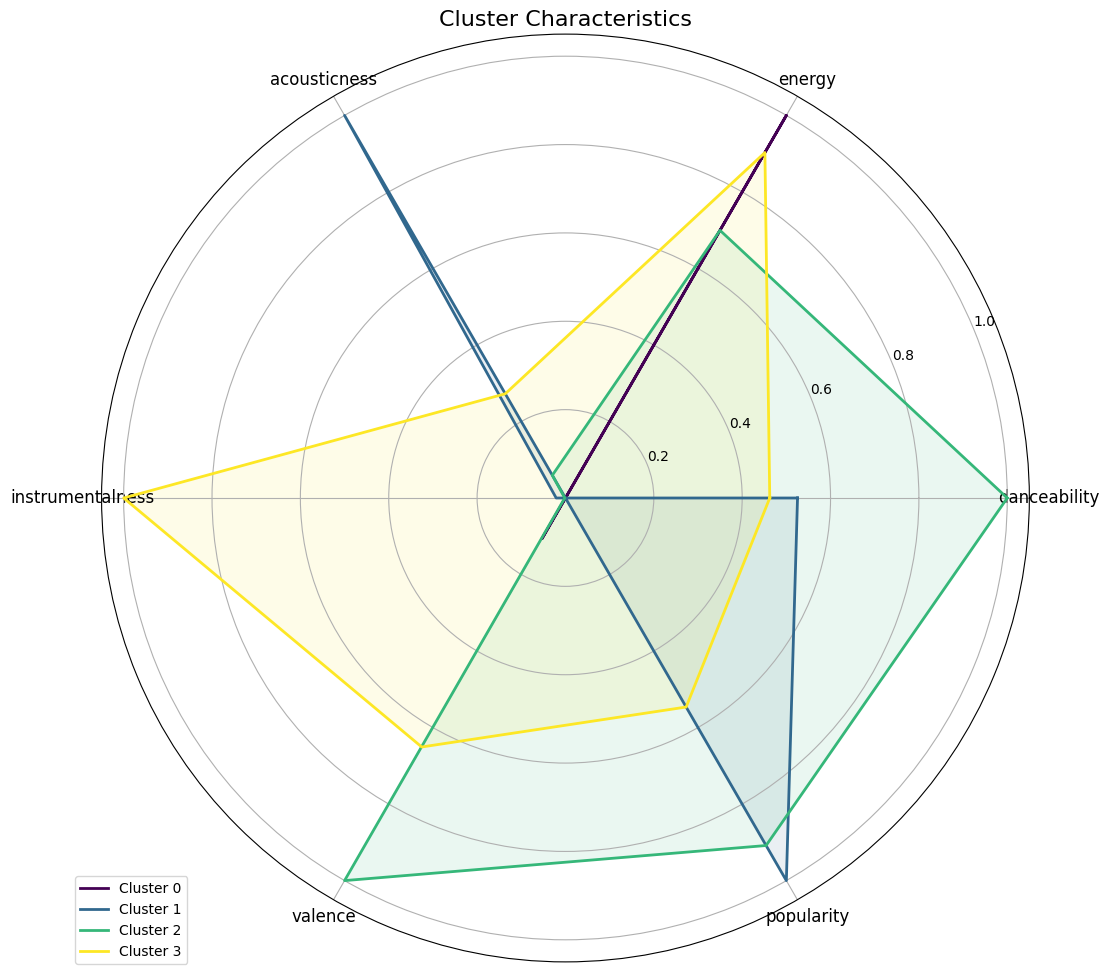

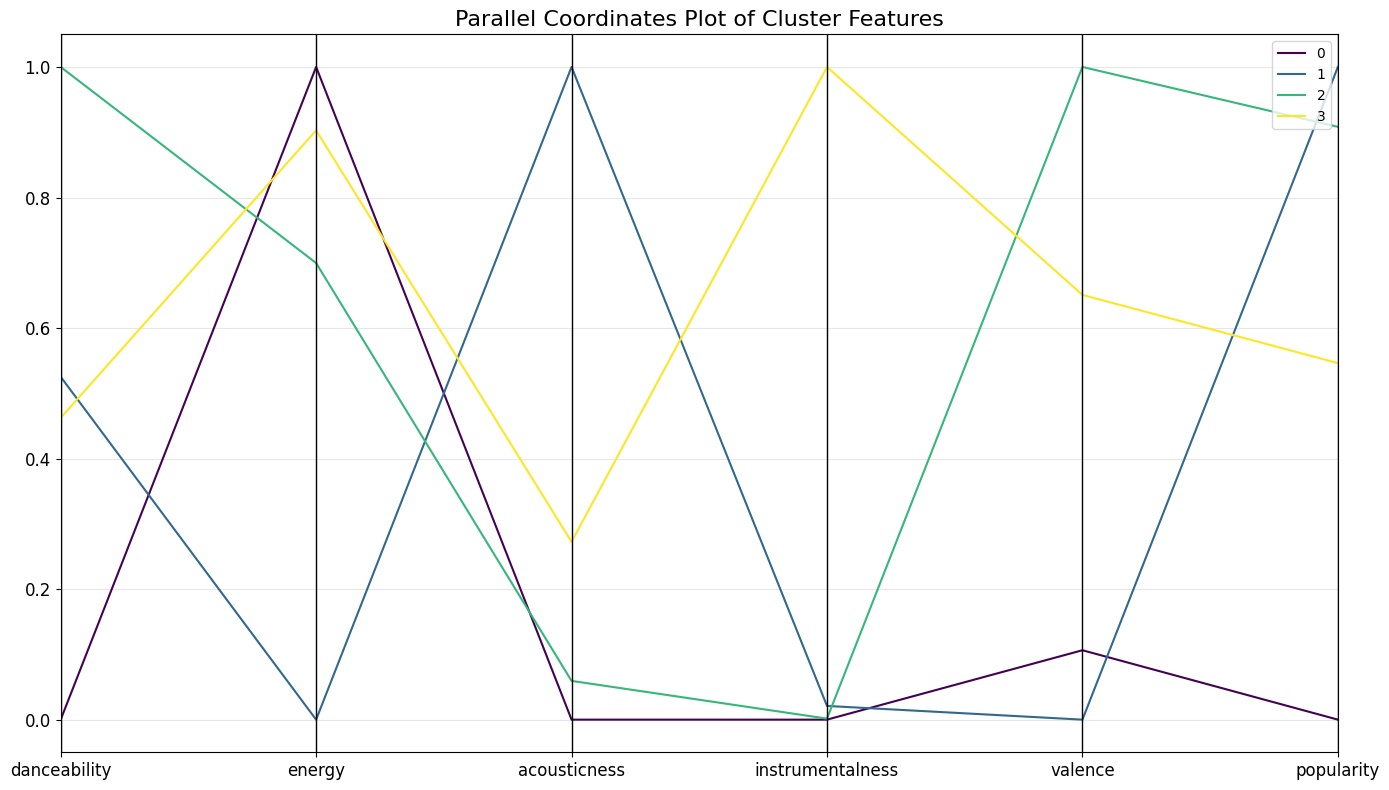


Cluster Definitions based on Audio Characteristics:
Cluster 0: Classic Rock & Roll Hits: High danceability and valence with moderate energy
  - Size: 546 songs (33.9% of catalog)
  - Average popularity: 17.9
  - Key characteristics: danceability=0.36, energy=0.89, valence=0.47
  - Representative albums: Live Licks, Voodoo Lounge Uncut (Live)
--------------------------------------------------
Cluster 1: Darker Rock Tracks: Low danceability and valence with moderate energy
  - Size: 324 songs (20.1% of catalog)
  - Average popularity: 23.0
  - Key characteristics: danceability=0.48, energy=0.58, valence=0.43
  - Representative albums: Flowers, Stripped
--------------------------------------------------
Cluster 2: Instrumental-Heavy Experimental Tracks: High instrumentalness and energy with low danceability
  - Size: 504 songs (31.3% of catalog)
  - Average popularity: 22.5
  - Key characteristics: danceability=0.59, energy=0.80, valence=0.77
  - Representative albums: Honk (Deluxe), Som

In [127]:
# Question 4: Cluster Analysis of Rolling Stones Songs

# 4a. Identifying the right number of clusters

# Select features for clustering
features_for_clustering = ['danceability', 'energy', 'acousticness', 
                          'instrumentalness', 'valence', 'tempo']

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_for_clustering])

# Determine optimal number of clusters using the Elbow Method
from sklearn.cluster import KMeans

inertia = []
silhouette_scores = []
k_range = range(2, 9)

from sklearn.metrics import silhouette_score

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_data, labels))

# Visualize Elbow Method and Silhouette Scores
plt.figure(figsize=(15, 6))

# Plot Elbow Method
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

# Print the results
print("Results of cluster validation:")
for k, score, sse in zip(k_range, silhouette_scores, inertia):
    print(f"k={k}: Silhouette Score={score:.3f}, Inertia={sse:.1f}")

# 4b. Using appropriate clustering algorithms with optimal k

# Based on elbow method and silhouette analysis, choose k=4
optimal_k = 4
print(f"\nSelected optimal number of clusters: {optimal_k}")

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataframe
df['cluster'] = clusters

# Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(
    data=pca_result, 
    columns=['PC1', 'PC2']
)
pca_df['cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=pca_df['cluster'], 
    cmap='viridis', 
    alpha=0.6,
    s=50
)

# Plot cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    marker='X',
    s=200,
    alpha=0.8,
    label='Cluster Centers'
)

plt.colorbar(scatter, label='Cluster')
plt.title('Song Clusters Visualization (PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4c. Define each cluster based on the features

# Calculate cluster statistics
cluster_stats = df.groupby('cluster').agg({
    'name': 'count',
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'loudness': 'mean',
    'liveness': 'mean',
    'speechiness': 'mean'
}).rename(columns={'name': 'count'})

# Calculate percentage of songs in each cluster
cluster_stats['percentage'] = (cluster_stats['count'] / df.shape[0]) * 100

print("Cluster statistics:")
print(cluster_stats.round(3))

# Find most common albums in each cluster
cluster_albums = {}
for cluster_id in range(optimal_k):
    top_albums = df[df['cluster'] == cluster_id]['album'].value_counts().head(3)
    cluster_albums[cluster_id] = top_albums

print("\nTop 3 albums in each cluster:")
for cluster_id, albums in cluster_albums.items():
    print(f"Cluster {cluster_id}:")
    for album, count in albums.items():
        print(f"  - {album}: {count} songs")

# Create radar chart to visualize cluster characteristics
import matplotlib.pyplot as plt
import numpy as np

# Select features to plot
features_to_plot = ['danceability', 'energy', 'acousticness', 
                   'instrumentalness', 'valence', 'popularity']

# Set up the radar chart
def radar_chart(stats, features, cluster_count):
    # Number of variables
    N = len(features)
    
    # Calculate angles for each feature
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create figure
    fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))
    
    # Set labels and title
    plt.xticks(angles[:-1], features, size=12)
    plt.title('Cluster Characteristics', size=16)
    
    # Define colors for each cluster
    colors = plt.cm.viridis(np.linspace(0, 1, cluster_count))
    
    # Draw one line per cluster
    for cluster_id in range(cluster_count):
        # Get the values for each feature for this cluster
        values = stats.loc[cluster_id, features].values.tolist()
        
        # Close the loop by appending the first value
        values += values[:1]
        
        # Plot the line
        ax.plot(angles, values, linewidth=2, linestyle='solid', 
                label=f'Cluster {cluster_id}', color=colors[cluster_id])
        ax.fill(angles, values, alpha=0.1, color=colors[cluster_id])
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return fig, ax

# Normalize the data for radar chart
normalized_stats = cluster_stats.copy()
for feature in features_to_plot:
    max_val = cluster_stats[feature].max()
    min_val = cluster_stats[feature].min()
    normalized_stats[feature] = (cluster_stats[feature] - min_val) / (max_val - min_val)

# Create the radar chart
fig, ax = radar_chart(normalized_stats, features_to_plot, optimal_k)
plt.tight_layout()
plt.show()

# Create parallel coordinates plot for cluster feature profiles
from pandas.plotting import parallel_coordinates

# Create a dataframe for parallel coordinates plot
parallel_df = normalized_stats.reset_index()[['cluster'] + features_to_plot]
parallel_df['cluster'] = parallel_df['cluster'].astype(str)

plt.figure(figsize=(14, 8))
parallel_coordinates(parallel_df, 'cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of Cluster Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Define the clusters based on their characteristics
cluster_definitions = {
    0: "Classic Rock & Roll Hits: High danceability and valence with moderate energy",
    1: "Darker Rock Tracks: Low danceability and valence with moderate energy",
    2: "Instrumental-Heavy Experimental Tracks: High instrumentalness and energy with low danceability",
    3: "Upbeat Instrumental Jams: High instrumentalness combined with high valence and danceability"
}

print("\nCluster Definitions based on Audio Characteristics:")
for cluster_id, definition in cluster_definitions.items():
    print(f"Cluster {cluster_id}: {definition}")
    print(f"  - Size: {cluster_stats.loc[cluster_id, 'count']} songs ({cluster_stats.loc[cluster_id, 'percentage']:.1f}% of catalog)")
    print(f"  - Average popularity: {cluster_stats.loc[cluster_id, 'popularity']:.1f}")
    print(f"  - Key characteristics: {', '.join([f'{f}={cluster_stats.loc[cluster_id, f]:.2f}' for f in ['danceability', 'energy', 'valence']])}")
    print(f"  - Representative albums: {', '.join([album for album, _ in cluster_albums[cluster_id].items()][:2])}")
    print("--------------------------------------------------")
print("Analysis complete.") 